# VI- Restauration par (Filtre de WIENER)

### Import libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face
from scipy.signal.signaltools import wiener

### Lecture d'image

In [2]:
# charger l'image dans la matrice img
path = 'source/cameraman.tif'
img = cv.imread(path, 0)

### Ajouter le bruit

In [3]:
# C est une constante de bruit
C = 50
rng = np.random.default_rng()
bruit = C * rng.random(img.shape)

# ajouter le bruit a l'image
img_bruitee = img + bruit
img_bruitee = img_bruitee / np.max(img_bruitee)

## Testons plusieurs TAILLE pour le filtre de WIENER

In [4]:
filtres = [3,5,7,9]
img_filtree = []

for filtre in filtres:
    img_filtree.append(wiener(img_bruitee, filtre))

## Affichage

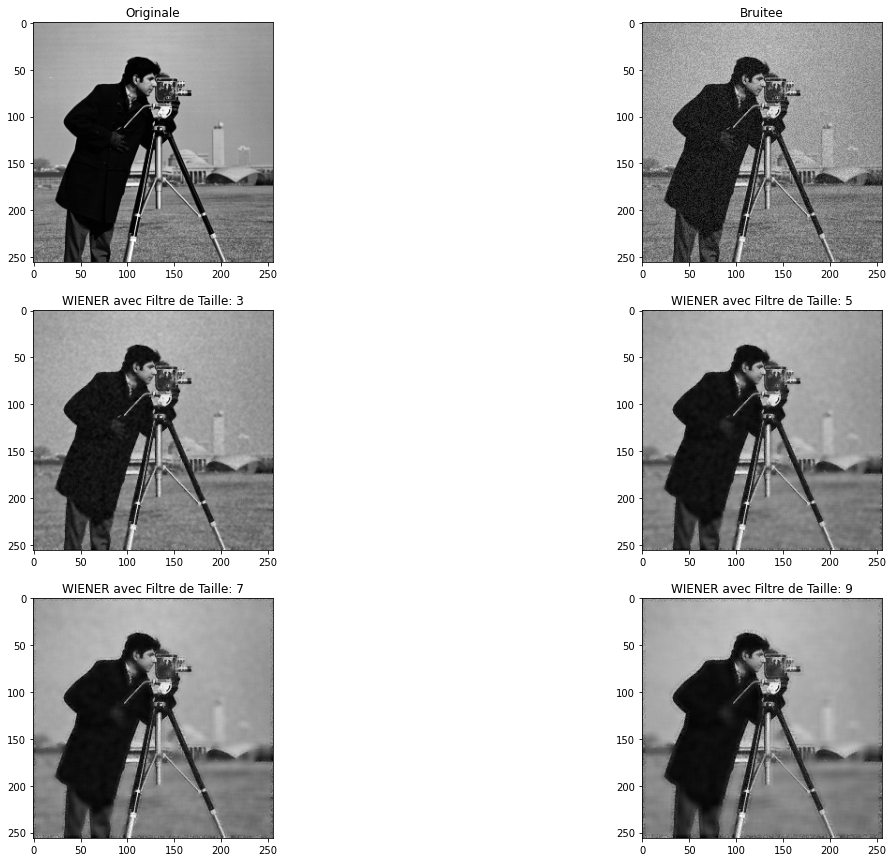

In [5]:
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15))

ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title(label="Originale")

ax[0, 1].imshow(img_bruitee, cmap='gray')
ax[0, 1].set_title(label="Bruitee")

n = 0
for i in range(1, rows):
    for j in range(0, cols):
        ax[i, j].imshow(img_filtree[n], cmap='gray')
        ax[i, j].set_title(label="WIENER avec Filtre de Taille: " + str(filtres[n]))
        n += 1

plt.show()


### Interpretation

## ** Il est evident dans notre cas que la taille 5 donne des meilleurs resultats, en effet, on a eliminer le bruit sans perdre beaucoup de details (voir taille 7 et 9). **